In [5]:
class CSP:
    def __init__(self, variables, dominios, restricciones):
        """
        Inicializa un problema de satisfacción de restricciones.
        
        Args:
            variables: Lista de variables
            dominios: Diccionario con los dominios de cada variable
            restricciones: Función que verifica si una asignación satisface las restricciones
        """
        self.variables = variables
        self.dominios = dominios
        self.restricciones = restricciones
        self.vecinos = {var: [] for var in variables}
        
        for var in variables:
            for other_var in variables:
                if var != other_var:
                    self.vecinos[var].append(other_var)

def backtracking(assignment, csp):
    """
    Algoritmo de backtracking para resolver un CSP.
    
    Args:
        assignment: Diccionario con la asignación actual (variable -> valor)
        csp: Objeto CSP
        
    Returns:
        Una asignación completa o fallo (None)
    """
    if len(assignment) == len(csp.variables):
        return assignment  
    var = seleccionar_variable_no_asignada(csp.variables, assignment, csp)
    for valor in orden_valores_dominio(var, assignment, csp):
        if es_consistente(var, valor, assignment, csp):
            assignment[var] = valor
            resultado = backtracking(assignment, csp)
            if resultado is not None:
                return resultado
            del assignment[var]
    return None

def seleccionar_variable_no_asignada(variables, assignment, csp):
    """
    Selecciona una variable no asignada usando la heurística MRV (Minimum Remaining Values).
    
    Returns:
        La variable no asignada con el menor número de valores válidos en su dominio
    """
    variables_no_asignadas = [var for var in variables if var not in assignment]
    return min(variables_no_asignadas, key=lambda var: len(csp.dominios[var]))

def orden_valores_dominio(var, assignment, csp):
    """
    REVISAR
    Ordena los valores del dominio según una heurística.
    Por simplicidad, devolvemos el dominio sin ordenar.
    
    Returns:
        Lista de valores en el dominio de la variable
    """
    def prioridad(x):
        diferencia = abs(x[1] - 9)
        if x[1] == 11:
            diferencia += 4
        return diferencia

    sort = sorted(csp.dominios[var], key=prioridad)
    return sort

def es_consistente(var, valor, assignment, csp):
    """
    REVISAR
    Verifica si la asignación de valor a var es consistente con las restricciones.
    
    Returns:
        True si la asignación es consistente, False en caso contrario
    """
    assignment_temp = assignment.copy()
    assignment_temp[var] = valor
    return csp.restricciones(assignment_temp)

def AC3(csp):
    """
    Algoritmo AC-3 para consistencia de arcos.
    """

    cola = [(xi, xj) for xi in csp.variables for xj in csp.vecinos[xi]]
    while cola:
        xi, xj = cola.pop(0)
        if borrar_valores_inconsistentes(xi, xj, csp):
            if len(csp.dominios[xi]) == 0:
                return False
            for xk in csp.vecinos[xi]:
                if xk != xj:
                    cola.append((xk, xi))
    return True

def borrar_valores_inconsistentes(xi, xj, csp):
    """
    REVISAR
    Borra valores inconsistentes del dominio de xi con respecto a xj.
    
    Args:
        xi, xj: Variables
        csp: Objeto CSP
        
    Returns:
        True si se borró algún valor, False en caso contrario
    """
    borrado = False
    valores_a_borrar = []
    for x in csp.dominios[xi]:
        satisface_restriccion = False
        for y in csp.dominios[xj]:
            assignment_temp = {xi: x, xj: y}
            if csp.restricciones(assignment_temp):
                satisface_restriccion = True
                break
        if not satisface_restriccion:
            valores_a_borrar.append(x)
            borrado = True
    for valor in valores_a_borrar:
        csp.dominios[xi].remove(valor)
    
    return borrado

**Restricciones:**

- Cursos del mismo semestre no pueden ocurrir a la misma hora
- Ningun par de cursos pueden ocurrir en el mismo salon a la misma hora  
- Un profesor no puede dar mas de un curso a la misma hora

In [6]:

def cursos_lcc_cps():
    cursos_segundo_semestre = [
        'Calculo II',
        'Algebra lineal I',
        'Mecanica I',
        'Matematicas discretas',
        'Programacion de computadoras',
        'Caracteristicas de la Sociedad Actual',
        'Historia de la Ciencia y la Tecnologia'
    ]

    cursos_cuarto_semestre = [
        'Probabilidad',
        'Electromagnetismo',
        'Estructura de datos',
        'Ingenieria de software I',
        'Teoria de la computacion',
        'Etica y desarrollo profesional',
        'Historia de Mexico'
    ]

    cursos_sexto_semestre = [
        'IA',
        'Arquitectura de computadoras',
        'Analisis de algoritmos',
        'Bases de datos',
        'Graficacion por computadora',
        'Topicos avanzados de CC'
    ]

    cursos_octavo_semestre = [
        'Redes II',
        'Procesos paralelos y distribuidos',
        'Seminario de IA'
    ]

    cursos_requieren_laboratorio = [
        'Programacion de computadoras',
        'Estructura de datos',
        'IA',
        'Arquitectura de computadoras',
        'Bases de datos',
        'Topicos avanzados de CC',
        'Redes II',
        'Procesos paralelos y distribuidos',
        'Seminario de IA'
    ]

    variables = cursos_segundo_semestre + cursos_cuarto_semestre + cursos_sexto_semestre + cursos_octavo_semestre

    # Dominio
    aulas = {'3K4-101': 'aula sencilla',
             '3K4-102': 'aula sencilla',
             '3K4-103': 'laboratorio',
             '3K4-202': 'laboratorio',
             '3K4-203': 'laboratorio',
            }

    horas = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

    profesores = {
        'Calculo II':['Prof. Anonimo 1', 'Prof. Anonimo 2', 'Prof. Anonimo 3'],
        'Algebra lineal I':['Prof. Anonimo 2', 'Prof. Anonimo 4', 'Prof. Anonimo 6'],
        'Mecanica I':['Prof. Anonimo 5', 'Prof. Anonimo 4', 'Prof. Anonimo 7'],
        'Matematicas discretas':['Eduardo','Edelmira','Irene'],
        'Programacion de computadoras':['Adrian','Irene'],
        'Caracteristicas de la Sociedad Actual':['Prof. Tronco 1', 'Prof. Tronco 2'],
        'Historia de la Ciencia y la Tecnologia':['Prof. Humanidades 1', 'Prof. Humanidades 2'], 
        'Probabilidad':['Prof. Anonimo 1', 'Prof. Anonimo 3', 'Prof. Anonimo 8'],
        'Electromagnetismo':['Prof. Anonimo 5', 'Prof. Anonimo 7'],
        'Estructura de datos':['Irene', 'Eduardo'],
        'Ingenieria de software I':['Mireles', 'Juan Pablo'],
        'Teoria de la computacion':['Gutu'],
        'Etica y desarrollo profesional':['Prof. Tronco 1', 'Prof. Tronco 3'],
        'Historia de Mexico':['Prof. Humanidades 2'],
        'IA':['Waissman','Eduardo'],
        'Arquitectura de computadoras':['Villa'],
        'Analisis de algoritmos':['Roberto'],
        'Bases de datos':['Mireles', 'Juan Pablo'],
        'Graficacion por computadora':['Roberto'],
        'Topicos avanzados de CC':['Adrian'],
        'Redes II':['Donald'],
        'Procesos paralelos y distribuidos':['Edelmira'],
        'Seminario de IA':['Sonia']
    }

    # Dominio: pares (aula, hora, profesor)
    dominio = {}
    for curso in variables:
        if curso in cursos_requieren_laboratorio:
            aulas_validas = [a for a, tipo in aulas.items() if tipo == 'laboratorio']
        else:
            aulas_validas = list(aulas.keys())
    
        dominio[curso] = [
            (aula, hora, profesor)
            for aula in aulas_validas
            for hora in horas
            for profesor in profesores.get(curso)
        ]

    
    # - Cursos del mismo semestre no pueden ocurrir a la misma hora
    # - Ningun par de cursos pueden ocurrir en el mismo salon a la misma hora  
    # - Un profesor no puede dar mas de un curso a la misma hora

    def cursos_restricciones(assignment):
        asignados = list(assignment.items())        
        for i in range(len(asignados)):
            curso1, (aula1, hora1, profesor1) = asignados[i]
            for j in range(i + 1, len(asignados)):
                curso2, (aula2, hora2, profesor2) = asignados[j]
                       
                # Restricción 1: Cursos del mismo semestre no pueden ocurrir a la misma hora
                if curso1 in cursos_segundo_semestre:
                    semestre1 = 2
                elif curso1 in cursos_cuarto_semestre:
                    semestre1 = 4
                elif curso1 in cursos_sexto_semestre:
                    semestre1 = 6
                elif curso1 in cursos_octavo_semestre:
                    semestre1 = 8

                if curso2 in cursos_segundo_semestre:
                    semestre2 = 2
                elif curso2 in cursos_cuarto_semestre:
                    semestre2 = 4
                elif curso2 in cursos_sexto_semestre:
                    semestre2 = 6
                elif curso2 in cursos_octavo_semestre:
                    semestre2 = 8

                if semestre1 == semestre2 and hora1 == hora2:
                    return False

                # Restricción 2: Ningún par de cursos pueden ocurrir en el mismo salón a la misma hora
                if aula1 == aula2 and hora1 == hora2:
                    return False
                if curso1 in cursos_segundo_semestre and curso2 in cursos_segundo_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_cuarto_semestre and curso2 in cursos_cuarto_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_sexto_semestre and curso2 in cursos_sexto_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_octavo_semestre and curso2 in cursos_octavo_semestre and hora1 == hora2:
                    return False
                # Restricción 3: Un profesor no puede dar más de un curso a la misma hora
                if profesor1 == profesor2 and hora1 == hora2:
                    return False
        return True


    # Crear el objeto CSP
    csp = CSP(variables, dominio, cursos_restricciones)
    
    AC3(csp)    
    solucion = backtracking({}, csp)
    
    if solucion:
        print("\nHorario:")
        horario = {hora: {aula: None for aula in aulas} for hora in horas}
        
        for curso, (aula, hora, profesor) in solucion.items():
            horario[hora][aula] = curso
        
        print("    | " + " | ".join(f"Aula {aula}" for aula in aulas))
        print("-" * 50)
        
        for hora in horas:
            row = f"{hora} | "
            for aula in aulas:
                curso = horario[hora][aula]
                if curso:
                    # Abreviamos los nombres para que quepan en la tabla
                    abreviatura = "".join(word[0] for word in curso.split())
                    row += f"{abreviatura}     | "
                else:
                    row += "Libre  | "
            print(row)
    else:
        print("No se encontró solución")

# Ejecutar el problema
if __name__ == "__main__":
    cursos_lcc_cps()


Horario:
    | Aula 3K4-101 | Aula 3K4-102 | Aula 3K4-103 | Aula 3K4-202 | Aula 3K4-203
--------------------------------------------------
7 | Gpc     | E     | CI     | Libre  | Libre  | 
8 | HdM     | CdlSA     | TadC     | SdI     | Libre  | 
9 | Tdlc     | Libre  | Adc     | RI     | Pdc     | 
10 | Ada     | HdlCylT     | Ppyd     | Edd     | Libre  | 
11 | Libre  | Libre  | Libre  | Libre  | Libre  | 
12 | IdsI     | AlI     | I     | Libre  | Libre  | 
13 | Eydp     | MI     | Bdd     | Libre  | Libre  | 
14 | Md     | P     | Libre  | Libre  | Libre  | 
15 | Libre  | Libre  | Libre  | Libre  | Libre  | 
16 | Libre  | Libre  | Libre  | Libre  | Libre  | 
17 | Libre  | Libre  | Libre  | Libre  | Libre  | 


In [ ]:
variables = [
    # 2DO SEMESTRE
    'Calculo II',
    'Algebra lineal I',
    'Mecanica I',
    'Matematicas discretas',
    'Programacion de computadoras',
    'Curso de tronco comun'
    'Optativa humanidades', 

    # 4TO SEMESTRE
    'Probabilidad',
    'Electromagnetismo',
    'Estructura de datos',
    'Ingenieria de software I',
    'Teoria de la computacion',
    'Curso de tronco comun',
    'Optativa humanidades',

    # 6TO SEMESTRE
    'IA',
    'Arquitectura de computadoras',
    'Analisis de algoritmos',
    'Bases de datos',
    'Especializante I',
    'Integrador I',

    # 8VO SEMESTRE
    'Especializante IV',
    'Especializante V',
    'Integrador III'
]

aulas = ['3K4-101', '3K4-102', '3K4-103', '3K4-202', '3K4-203']
laboratorios = ['3K4-103', '3K4-202', '3K4-203']


['Calculo II', 'Algebra lineal I', 'Mecanica I', 'Matematicas discretas', 'Programacion de computadoras', 'Curso de tronco comun', 'Optativa humanidades', 'Probabilidad', 'Electromagnetismo', 'Estructura de datos', 'Ingenieria de software I', 'Teoria de la computacion', 'Curso de tronco comun', 'Optativa humanidades', 'IA', 'Arquitectura de computadoras', 'Analisis de algoritmos', 'Bases de datos', 'Especializante I', 'Integrador I', 'Especializante IV', 'Especializante V', 'Integrador III']


In [ ]:
cursos_requieren_laboratorio = [
    'Programacion de computadoras',
    'Estructura de datos',
    'IA',
    'Arquitectura de computadoras',
    'Bases de datos',
    'Topicos avanzados de CC',
    'Redes II',
    'Procesos paralelos y distribuidos',
    'Seminario de IA'
]

cursos_no_laboratorios = [
    'Calculo II',
    'Algebra lineal I',
    'Mecanica I',
    'Matematicas discretas',
    'Programacion de computadoras',
    'Curso de tronco comun'
    'Optativa humanidades', 
    'Probabilidad',
    'Electromagnetismo',
    'Estructura de datos',
    'Ingenieria de software I',
    'Teoria de la computacion',
    'Curso de tronco comun',
    'Optativa humanidades',
    'IA',
    'Arquitectura de computadoras',
    'Analisis de algoritmos',
    'Bases de datos',
    'Especializante I',
    'Integrador I',
    'Especializante IV',
    'Especializante V',
    'Integrador III'
]



In [3]:
!pip3 install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.9 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.6 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 31.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 8.0 MB/s eta 0:00:01     |████████████████▋               | 1.7 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.2 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 20.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


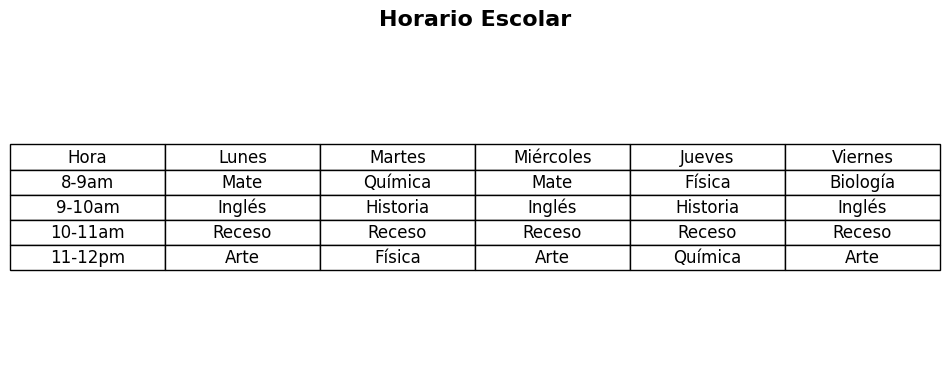

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos del horario
data = {
    'Hora': ['8-9am', '9-10am', '10-11am', '11-12pm'],
    'Lunes': ['Mate', 'Inglés', 'Receso', 'Arte'],
    'Martes': ['Química', 'Historia', 'Receso', 'Física'],
    'Miércoles': ['Mate', 'Inglés', 'Receso', 'Arte'],
    'Jueves': ['Física', 'Historia', 'Receso', 'Química'],
    'Viernes': ['Biología', 'Inglés', 'Receso', 'Arte'],
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear figura y ocultar ejes
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

# Dibujar la tabla
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Estilo: agrandar fuente
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.5)

# Mostrar
plt.title("Horario Escolar", fontsize=16, weight='bold', pad=20)
plt.show()
